In [19]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [28]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [29]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

In [30]:
# Defining the variables of the model by sympy
l1 = sm.symbols('l_1')
l2 = sm.symbols('l_2')
c1 = sm.symbols('c_1')
c2 = sm.symbols('c_2')
h1 = sm.symbols('h_1')
h2 = sm.symbols('h_2')
rho_sm = sm.symbols('rho')
beta_sm = sm.symbols('beta')
gamma_sm = sm.symbols('gamma')
w_sm = sm.symbols('w')
b_sm = sm.symbols('b')
Delta_sm = sm.symbols('Delta')

# Defining the equations in terms of the sympy variables

value2 = c2**(1 - rho_sm)/(1-rho_sm)-gamma_sm*l2
constraint = w_sm*h2*l2

# Substitution the constraint into the function of value
value2_sub = value2.subs(c2,constraint)

# The value is optimized w.r.t. labor
foc = sm.diff(value2_sub,l2)

# labor in period 2 is isolated to find labor supply as a function of human capital
labor_supp_2 = sm.solve(sm.Eq(foc,0),l2)
labor_supp_2

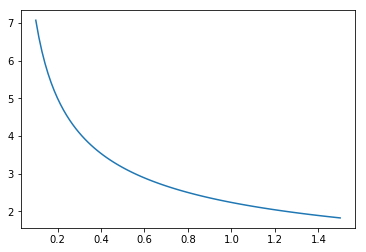

In [31]:
# Plotting the optimal labor supply as a function of human capital
def sol_l2(h2,w,gamma,rho):
    sol = (h2*w/gamma)**(1/rho)/(h2*w)
    return sol

plt.figure()
plt.plot(h_vec,sol_l2(h_vec,2,0.1,2))



Define human capital in period 2 

In [32]:
# Firstly we isolate human capital 
hc_2 = sm.solve(sm.Eq(foc,0),h2)
hc_2

In [33]:
# Define human capital
def hc2(l2,gamma,rho,w): 
    return (gamma*l2)**(-1/(rho-1))/l2*w

In [34]:
hc2(1,gamma,rho,w)

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital).

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [132]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [133]:
# Importing the sympy module
import sympy as sm
sm.init_printing(use_unicode=True)

In [134]:
# Defining the variables and the parameters of the model in terms of sympy
y = sm.symbols('y_t')
pi = sm.symbols('pi_t')
y1 = sm.symbols('y_t-1')
pi1 = sm.symbols('pi_t-1')
v = sm.symbols('v_t')
s = sm.symbols('s_t')
s1 = sm.symbols('s_t-1')
gamma = sm.symbols('gamma')
alpha = sm.symbols('alpha')
h = sm.symbols('h')
b = sm.symbols('b')
phi = sm.symbols('phi')

# Defining the AD and SRAS equations in terms of the sympy variables
SRAS = pi1 + gamma*y-phi*gamma*y1+s-phi*s1
AD = 1/(h*alpha)*(v-(1+b*alpha)*y)

In [138]:
# We set SRAS equal to AS 
SRAS_AD = sm.Eq(SRAS, AD)

In [139]:
y_st = sm.solve(SRAS_AD, y)

The optimal value for y in equilibrium is:


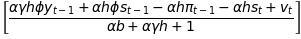

In [140]:
print(f'The optimal value for y in equilibrium is:')
y_st

We can now find the value for $\pi_t$ given the value for $y_t$

In [141]:
pi_st = 1/(h*alpha)*(v-(1+b*alpha)*y_st[0])  # we add [0] as y_t is a list with one element at index 0

The optimal value for pi in equilibrium is:


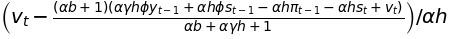

In [142]:
print(f'The optimal value for pi in equilibrium is:')
pi_st

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

Firstly we turn our sympy functions into numerically functions such that we can solve for $y_t$ and $\pi_t$

In [143]:
y_num = sm.lambdify((v,alpha,b,gamma,h,phi,y1,pi1,s,s1),y_st[0])
pi_num = sm.lambdify((v,alpha,b,gamma,h,phi,y1,pi1,s,s1), pi_st)

Next, we define output and inflation as functions, $y_t$ and $\pi_t$

In [144]:
def y_func(v,alpha,b,gamma,h,phi,y1,pi1,s,s1):
    return y_num(v,alpha,b,gamma,h,phi,y1,pi1,s,s1)

def pi_func(v,alpha,b,gamma,h,phi,y1,pi1,s,s1):
    return pi_num(v,alpha,b,gamma,h,phi,y1,pi1,s,s1)

For $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$ we get that $y_t$ and $\pi_t$ in equilibrium are: 

In [145]:
print(f'y in equilibrium:',y_func(v=0,alpha=5.76,b=0.5,gamma=0.075,h=0.5,phi=0,y1=0,pi1=0,s=0,s1=0))
print(f'pi in equilibrium:',pi_func(v=0,alpha=5.76,b=0.5,gamma=0.075,h=0.5,phi=0,y1=0,pi1=0,s=0,s1=0))

y in equilibrium: 0.0
pi in equilibrium: 0.0


For the demand shock $v_t=0.1$ we get that $y_t$ and $\pi_t$ are:

In [146]:
print(f'y when v_t=0.1:',y_func(v=0.1,alpha=5.76,b=0.5,gamma=0.075,h=0.5,phi=0,y1=0,pi1=0,s=0,s1=0))
print(f'pi when v_t=0.1:',pi_func(v=0.1,alpha=5.76,b=0.5,gamma=0.075,h=0.5,phi=0,y1=0,pi1=0,s=0,s1=0))

y when v_t=0.1: 0.0244140625
pi when v_t=0.1: 0.001831054687500002


To illustrate this graphically we define our AD and SRAS curves numerically 

In [147]:
def SRAS_fun(pi1,gamma,phi,s,s1,y): 
    return pi1 + gamma*y-phi*gamma*y1+s-phi*s1

def AD_fun(h,alpha,v,b,y): 
    return 1/(h*alpha)*(v-(1+b*alpha)*y)

Text(0.5, 1.0, 'AD-AS Model with demand shock')

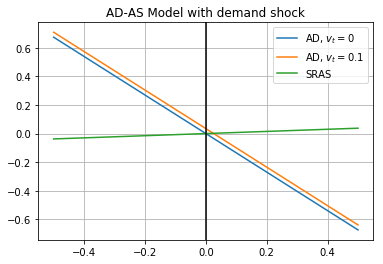

In [148]:
# Plotting the AD and SRAS curve befora and after the shock

# Setting values and parameters
alpha = 5.76
h = 0.5
b = 0.5
phi = 0
gamma = 0.075
pi1 = 0
phi = 0 
s = 0 
s1 = 0 
v = 0
v_shock = 0.1
y = np.linspace(-0.5,0.5,100)

AD_new = AD_fun(h,alpha,v,b,y)
AD_shock = AD_fun(h,alpha,v_shock,b,y)
SRAS_new = SRAS_fun(pi1,gamma,phi,s,s1,y)

plt.plot(y, AD_new, label="AD, $v_t=0$")
plt.plot(y, AD_shock, label="AD, $v_t=0.1$")
plt.plot(y, SRAS_new, label="SRAS")
plt.legend(loc='upper right')
plt.axvline(x=0,color='k')
plt.grid()
plt.title("AD-AS Model with demand shock")

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [149]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [151]:
# To simulate the AR(1) processes we set the initial values


# We set all endogenous variables to zero in all periods
T = 100
c = np.zeros(T)
x = np.zeros(T)
x[1]=0.1
v = np.zeros(T)
s = np.zeros(T)
y = np.zeros(T)
pi = np.zeros(T)

# Then we solve for the AD and SRAS curve
for t in range(1, T):
    def ASAD(t):
        y, pi = t
        return
    
for t in range(1, T):
    
    # Process for the movements of v and s
    v[t] = v_func(v[t-1], x[t])
    s[t] = s_func(s[t-1], x[t])

    # Calculation of y and pi
    y[t] = y_st[y[t-1], v[t], v[t-1], s[t], s[t-1], pi[t-1]]
    pi[t] = pi_st[p[t-1], v[t], v[t-1], s[t], s[t-1], y[t-1]]

NameError: name 'v_func' is not defined

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [7]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [7]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?